In [2]:
import torch
import torchvision

In [3]:
train_dataset = torchvision.datasets.MNIST(
    root="MNIST",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
)
test_dataset = torchvision.datasets.MNIST(
    root="MNIST",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True,
)

In [4]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

In [5]:
images, labels = next(iter(train_loader))

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [9]:
images[0].view(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

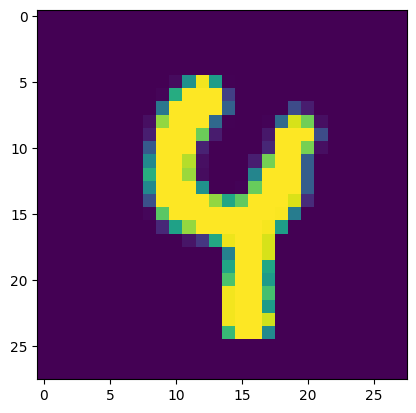

tensor(4)


In [10]:
import matplotlib.pyplot as plt

plt.imshow(images[0].view(28, 28))
plt.show()
print(labels[0])

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [31]:
input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
lr = 1e-3

In [37]:
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super().__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)

        return out

In [38]:
net = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [40]:
net((images[0]).to(device))

tensor([[ 0.0952, -0.0606, -0.0623,  0.0131,  0.0523, -0.0873, -0.0558, -0.0923,
         -0.0428,  0.0983]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [53]:
# 学習前推論
pred = net((images[0]).to(device)).max(dim=1)[1].item()
pred

9

In [55]:
true = labels[0].item()
# 推論 = 正解？
print(f"pred: {pred} true: {true}")
print("collect!") if pred == true else print("misdetect...")

pred: 9 true: 4
misdetect...
